# **PIAIC Pandas Assignment 2**
Hafiz Muhammad Sarmad Khan
PIAIC_AI_101225

# PART 1: 

**HOW TO CLEAN DATA WITH PYTHON**


Cleaning US Census Data
You just got hired as a Data Analyst at the Census Bureau, which collects census data and creates interesting visualizations and insights from it.

The person who had your job before you left you all the data they had for the most recent census. It is in multiple csv files. They didn’t use pandas, they would just look through these csv files manually whenever they wanted to find something. Sometimes they would copy and paste certain numbers into Excel to make charts.

The thought of it makes you shiver. This is not scalable or repeatable.

Your boss wants you to make some scatterplots and histograms by the end of the day. Can you get this data into pandas and into reasonable shape so that you can make these histograms?

### Inspect the Data!
1.
The first visualization your boss wants you to make is a scatterplot that shows average income in a state vs proportion of women in that state.

Open some of the census csv files in the navigator. How are they named? What kind of information do they hold? Will they help us make this graph?

In [ ]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

In [ ]:
# checking one of the csv file
pd.read_csv('states0.csv')

Unnamed: 0       State  TotalPop             Hispanic                White  \
0           0     Alabama   4830620  3.7516156462584975%     61.878656462585%   
1           1      Alaska    733375   5.909580838323351%  60.910179640718574%   
2           2     Arizona   6641928  29.565921052631502%  57.120000000000026%   
3           3    Arkansas   2958208   6.215474452554738%   71.13781021897813%   
4           4  California  38421464  37.291874687968054%   40.21578881677474%   
5           5    Colorado   5278906   20.78438003220608%   69.89557165861504%   

                 Black                Native                Asian  \
0   31.25297619047618%   0.4532312925170065%  1.0502551020408146%   
1  2.8485029940119775%    16.39101796407186%   5.450299401197604%   
2  3.8509868421052658%     4.35506578947368%   2.876578947368419%   
3  18.968759124087573%   0.5229197080291965%  1.1423357664233578%   
4   5.677396405391911%  0.40529206190713685%  13.052234148776776%   
5   3.546376811594201%   0.5738325281803548%   2.661996779388082%   

                Pacific               Income            GenderPop  
0  0.03435374149659865%   $43296.35860306644    2341093M_2489527F  
1   1.0586826347305378%   $70354.74390243902      384160M_349215F  
2  0.16763157894736833%   $54207.82095490716    3299088M_3342840F  
3  0.14686131386861315%   $41935.63396778917    1451913M_1506295F  
4  0.35141038442336353%   $67264.78230266465  19087135M_19334329F  
5                   NaN  $64657.801787164906    2648667M_2630239F

In [ ]:
# Checking some of the attributes of the csv file (i-e column headings, shape and size of DataFrame, and any Null values)

print(pd.read_csv('states0.csv').columns)
print('-------------------------------------')
print(pd.read_csv('states0.csv').shape)
print('-------------------------------------')
print(pd.read_csv('states0.csv').size)
print('-------------------------------------')
print(pd.read_csv('states0.csv').isnull().any())

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')
-------------------------------------
(6, 11)
-------------------------------------
66
-------------------------------------
Unnamed: 0    False
State         False
TotalPop      False
Hispanic      False
White         False
Black         False
Native        False
Asian         False
Pacific        True
Income        False
GenderPop     False
dtype: bool


2.
It will be easier to inspect this data once we have it in a DataFrame. You can’t even call .head() on these csvs! How are you supposed to read them?

Using glob, loop through the census files available and load them into DataFrames. Then, concatenate all of those DataFrames together into one DataFrame, called something like us_census.

In [ ]:
# read all csv files
census_files = glob.glob('states*.csv')

df_list = []
for _file in census_files:
    data = pd.read_csv(_file)
    df_list.append(data)

census_files

['states0.csv',
 'states1.csv',
 'states2.csv',
 'states3.csv',
 'states4.csv',
 'states5.csv',
 'states6.csv',
 'states7.csv',
 'states8.csv',
 'states9.csv']

In [ ]:
# DataFrame Concatenation

us_census = pd.concat(df_list, ignore_index=True)

In [ ]:
us_census.head()

Unnamed: 0       State  TotalPop             Hispanic                White  \
0           0     Alabama   4830620  3.7516156462584975%     61.878656462585%   
1           1      Alaska    733375   5.909580838323351%  60.910179640718574%   
2           2     Arizona   6641928  29.565921052631502%  57.120000000000026%   
3           3    Arkansas   2958208   6.215474452554738%   71.13781021897813%   
4           4  California  38421464  37.291874687968054%   40.21578881677474%   

                 Black                Native                Asian  \
0   31.25297619047618%   0.4532312925170065%  1.0502551020408146%   
1  2.8485029940119775%    16.39101796407186%   5.450299401197604%   
2  3.8509868421052658%     4.35506578947368%   2.876578947368419%   
3  18.968759124087573%   0.5229197080291965%  1.1423357664233578%   
4   5.677396405391911%  0.40529206190713685%  13.052234148776776%   

                Pacific              Income            GenderPop  
0  0.03435374149659865%  $43296.35860306644    2341093M_2489527F  
1   1.0586826347305378%  $70354.74390243902      384160M_349215F  
2  0.16763157894736833%  $54207.82095490716    3299088M_3342840F  
3  0.14686131386861315%  $41935.63396778917    1451913M_1506295F  
4  0.35141038442336353%  $67264.78230266465  19087135M_19334329F

3.
Look at the columns and the dtypes of the us_census DataFrame. Are those datatypes going to hinder you as you try to make histograms?

In [ ]:
us_census.columns

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')

In [ ]:
us_census.dtypes

Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object

In [ ]:
us_census.head()

Unnamed: 0       State  TotalPop             Hispanic                White  \
0           0     Alabama   4830620  3.7516156462584975%     61.878656462585%   
1           1      Alaska    733375   5.909580838323351%  60.910179640718574%   
2           2     Arizona   6641928  29.565921052631502%  57.120000000000026%   
3           3    Arkansas   2958208   6.215474452554738%   71.13781021897813%   
4           4  California  38421464  37.291874687968054%   40.21578881677474%   

                 Black                Native                Asian  \
0   31.25297619047618%   0.4532312925170065%  1.0502551020408146%   
1  2.8485029940119775%    16.39101796407186%   5.450299401197604%   
2  3.8509868421052658%     4.35506578947368%   2.876578947368419%   
3  18.968759124087573%   0.5229197080291965%  1.1423357664233578%   
4   5.677396405391911%  0.40529206190713685%  13.052234148776776%   

                Pacific              Income            GenderPop  
0  0.03435374149659865%  $43296.35860306644    2341093M_2489527F  
1   1.0586826347305378%  $70354.74390243902      384160M_349215F  
2  0.16763157894736833%  $54207.82095490716    3299088M_3342840F  
3  0.14686131386861315%  $41935.63396778917    1451913M_1506295F  
4  0.35141038442336353%  $67264.78230266465  19087135M_19334329F

In [ ]:
# Dropping the column named "Unnamed" which is not required in data analysis
us_census.drop('Unnamed: 0', inplace=True, axis=1)
us_census.head()

State  TotalPop             Hispanic                White  \
0     Alabama   4830620  3.7516156462584975%     61.878656462585%   
1      Alaska    733375   5.909580838323351%  60.910179640718574%   
2     Arizona   6641928  29.565921052631502%  57.120000000000026%   
3    Arkansas   2958208   6.215474452554738%   71.13781021897813%   
4  California  38421464  37.291874687968054%   40.21578881677474%   

                 Black                Native                Asian  \
0   31.25297619047618%   0.4532312925170065%  1.0502551020408146%   
1  2.8485029940119775%    16.39101796407186%   5.450299401197604%   
2  3.8509868421052658%     4.35506578947368%   2.876578947368419%   
3  18.968759124087573%   0.5229197080291965%  1.1423357664233578%   
4   5.677396405391911%  0.40529206190713685%  13.052234148776776%   

                Pacific              Income            GenderPop  
0  0.03435374149659865%  $43296.35860306644    2341093M_2489527F  
1   1.0586826347305378%  $70354.74390243902      384160M_349215F  
2  0.16763157894736833%  $54207.82095490716    3299088M_3342840F  
3  0.14686131386861315%  $41935.63396778917    1451913M_1506295F  
4  0.35141038442336353%  $67264.78230266465  19087135M_19334329F

4.
Look at the .head() of the DataFrame so that you can understand why some of these dtypes are objects instead of integers or floats.

Start to make a plan for how to convert these columns into the right types for manipulation.

Regex to the Rescue

5.
Use regex to turn the Income column into a format that is ready for conversion into a numerical type.

In [ ]:
# get the info [head()] about the "Income" column
us_census['Income'].head()

0    $43296.35860306644
1    $70354.74390243902
2    $54207.82095490716
3    $41935.63396778917
4    $67264.78230266465
Name: Income, dtype: object

In [ ]:
# Remove the "$" symbol from the data in 'Income' column
# and convert it into numeric value

us_census['Income'] = us_census['Income'].replace('[\$,]','',regex=True)
us_census['Income'] = pd.to_numeric(us_census.Income)

In [ ]:
us_census.Income.head()

0    43296.358603
1    70354.743902
2    54207.820955
3    41935.633968
4    67264.782303
Name: Income, dtype: float64

6.
Look at the GenderPop column. We are going to want to separate this into two columns, the Men column, and the Women column.

Split the column into those two new columns using str.split and separating out those results.

In [ ]:
# Check the head() of the "GenderPop" Column
us_census.GenderPop.head()

0      2341093M_2489527F
1        384160M_349215F
2      3299088M_3342840F
3      1451913M_1506295F
4    19087135M_19334329F
Name: GenderPop, dtype: object

In [ ]:
# Splitting this column into separate "Men" and "Women" columns

us_census['Men'] = us_census['GenderPop'].str.split('(_)', expand=True)[0]
us_census['Women'] = us_census['GenderPop'].str.split('(_)', expand=True)[2]
us_census.head()

State  TotalPop             Hispanic                White  \
0     Alabama   4830620  3.7516156462584975%     61.878656462585%   
1      Alaska    733375   5.909580838323351%  60.910179640718574%   
2     Arizona   6641928  29.565921052631502%  57.120000000000026%   
3    Arkansas   2958208   6.215474452554738%   71.13781021897813%   
4  California  38421464  37.291874687968054%   40.21578881677474%   

                 Black                Native                Asian  \
0   31.25297619047618%   0.4532312925170065%  1.0502551020408146%   
1  2.8485029940119775%    16.39101796407186%   5.450299401197604%   
2  3.8509868421052658%     4.35506578947368%   2.876578947368419%   
3  18.968759124087573%   0.5229197080291965%  1.1423357664233578%   
4   5.677396405391911%  0.40529206190713685%  13.052234148776776%   

                Pacific        Income            GenderPop        Men  \
0  0.03435374149659865%  43296.358603    2341093M_2489527F   2341093M   
1   1.0586826347305378%  70354.743902      384160M_349215F    384160M   
2  0.16763157894736833%  54207.820955    3299088M_3342840F   3299088M   
3  0.14686131386861315%  41935.633968    1451913M_1506295F   1451913M   
4  0.35141038442336353%  67264.782303  19087135M_19334329F  19087135M   

       Women  
0   2489527F  
1    349215F  
2   3342840F  
3   1506295F  
4  19334329F

7.
Convert both of the columns into numerical datatypes.

There is still an M or an F character in each entry! We should remove those before we convert.

In [ ]:
# Remove the M from the "Men" Column
us_census['Men'] = us_census['Men'].replace('M','',regex=True)
us_census.Men.head()

0     2341093
1      384160
2     3299088
3     1451913
4    19087135
Name: Men, dtype: object

In [ ]:
# Remove the F from the "Women" Column
us_census['Women'] = us_census['Women'].replace('F','',regex=True)
us_census.Men.head()

0     2341093
1      384160
2     3299088
3     1451913
4    19087135
Name: Men, dtype: object

In [ ]:
# Convert both Men and Women column to numeric value
us_census['Men'] = pd.to_numeric(us_census.Men)
us_census['Women'] = pd.to_numeric(us_census.Women)
us_census.head()

State  TotalPop             Hispanic                White  \
0     Alabama   4830620  3.7516156462584975%     61.878656462585%   
1      Alaska    733375   5.909580838323351%  60.910179640718574%   
2     Arizona   6641928  29.565921052631502%  57.120000000000026%   
3    Arkansas   2958208   6.215474452554738%   71.13781021897813%   
4  California  38421464  37.291874687968054%   40.21578881677474%   

                 Black                Native                Asian  \
0   31.25297619047618%   0.4532312925170065%  1.0502551020408146%   
1  2.8485029940119775%    16.39101796407186%   5.450299401197604%   
2  3.8509868421052658%     4.35506578947368%   2.876578947368419%   
3  18.968759124087573%   0.5229197080291965%  1.1423357664233578%   
4   5.677396405391911%  0.40529206190713685%  13.052234148776776%   

                Pacific        Income            GenderPop       Men  \
0  0.03435374149659865%  43296.358603    2341093M_2489527F   2341093   
1   1.0586826347305378%  70354.743902      384160M_349215F    384160   
2  0.16763157894736833%  54207.820955    3299088M_3342840F   3299088   
3  0.14686131386861315%  41935.633968    1451913M_1506295F   1451913   
4  0.35141038442336353%  67264.782303  19087135M_19334329F  19087135   

        Women  
0   2489527.0  
1    349215.0  
2   3342840.0  
3   1506295.0  
4  19334329.0

8.
Now you should have the columns you need to make the graph and make sure your boss does not slam a ruler angrily on your desk because you’ve wasted your whole day cleaning your data with no results to show!

Use matplotlib to make a scatterplot!

    plt.scatter(the_women_column, the_income_column) 
Remember to call plt.show() to see the graph!

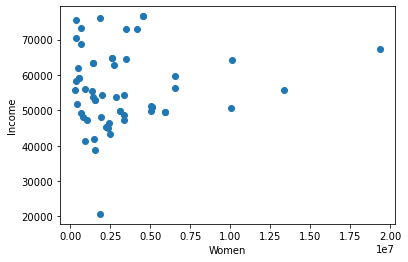

-----------------------------------------------


0      2489527.0
1       349215.0
2      3342840.0
3      1506295.0
4     19334329.0
5      2630239.0
6      2630239.0
7      1841615.0
8       478041.0
9       340810.0
10    10045763.0
11     5123362.0
12     5123362.0
13      696428.0
14      806083.0
15     6556862.0
16     3333382.0
17     1558931.0
18     1558931.0
19     1453125.0
20     2233145.0
21     2364097.0
22      679019.0
23           NaN
24           NaN
25     3455936.0
26     5038598.0
27     2727005.0
28     1536358.0
29     3081445.0
30     3081445.0
31           NaN
32      939759.0
33     1390901.0
34      670717.0
35     4561386.0
36     4561386.0
37     1051703.0
38    10131373.0
39     5049925.0
40      353677.0
41     5913084.0
42     5913084.0
43     1942789.0
44     1990780.0
45     6534215.0
46     1869213.0
47      543273.0
48      543273.0
49     2455167.0
50      419713.0
51     3331859.0
52    13367298.0
53     1444150.0
54     1444150.0
55      318031.0
56     4195682.0
57     3497739.0
58      937789

<Figure size 432x288 with 0 Axes>

In [ ]:
# Now plotting women's income data 
plt.scatter(us_census.Women, us_census.Income)
plt.xlabel('Women')
plt.ylabel('Income')
plt.show()
plt.clf()
print('-----------------------------------------------')
us_census['Women']

9.
Did you get an error? These monstrous csv files probably have nan values in them! Print out your column with the number of women per state to see.

We can fill in those NaNs by using pandas’ .fillna() function.

You have the TotalPop per state, and you have the Men per state. As an estimate for the nan values in the Women column, you could use the TotalPop of that state minus the Men for that state.

Print out the Women column after filling the nan values to see if it worked!

In [ ]:
us_census.Women.isnull()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23     True
24     True
25    False
26    False
27    False
28    False
29    False
30    False
31     True
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
52    False
53    False
54    False
55    False
56    False
57    False
58    False
59    False
Name: Women, dtype: bool

In [ ]:
# checking Null Value Counts
us_census.Women.isnull().value_counts()

False    57
True      3
Name: Women, dtype: int64

In [ ]:
# Checking an example of a record indexed at '23'
check_Nan_example = us_census[['TotalPop', 'Men','Women']]
check_Nan_example.iloc[23]

TotalPop    5930538.0
Men         2872643.0
Women             NaN
Name: 23, dtype: float64

In [ ]:
# Filling NA values in "Women" column we can replace these by, some values like (Total Population - Men's column)

us_census['Women'] = us_census['Women'].fillna(us_census.TotalPop - us_census.Men)
us_census.Women

0      2489527.0
1       349215.0
2      3342840.0
3      1506295.0
4     19334329.0
5      2630239.0
6      2630239.0
7      1841615.0
8       478041.0
9       340810.0
10    10045763.0
11     5123362.0
12     5123362.0
13      696428.0
14      806083.0
15     6556862.0
16     3333382.0
17     1558931.0
18     1558931.0
19     1453125.0
20     2233145.0
21     2364097.0
22      679019.0
23     3057895.0
24     3057895.0
25     3455936.0
26     5038598.0
27     2727005.0
28     1536358.0
29     3081445.0
30     3081445.0
31      504536.0
32      939759.0
33     1390901.0
34      670717.0
35     4561386.0
36     4561386.0
37     1051703.0
38    10131373.0
39     5049925.0
40      353677.0
41     5913084.0
42     5913084.0
43     1942789.0
44     1990780.0
45     6534215.0
46     1869213.0
47      543273.0
48      543273.0
49     2455167.0
50      419713.0
51     3331859.0
52    13367298.0
53     1444150.0
54     1444150.0
55      318031.0
56     4195682.0
57     3497739.0
58      937789

In [ ]:
# checking again for Null Value Counts
us_census.Women.isnull().value_counts()

False    60
Name: Women, dtype: int64

10.
We forgot to check for duplicates! Use .duplicated() on your census DataFrame to see if we have duplicate rows in there.

In [ ]:
# checking the duplicated values in the DataFrame
us_census.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6      True
7     False
8     False
9     False
10    False
11    False
12     True
13    False
14    False
15    False
16    False
17    False
18     True
19    False
20    False
21    False
22    False
23    False
24     True
25    False
26    False
27    False
28    False
29    False
30     True
31    False
32    False
33    False
34    False
35    False
36     True
37    False
38    False
39    False
40    False
41    False
42     True
43    False
44    False
45    False
46    False
47    False
48     True
49    False
50    False
51    False
52    False
53    False
54     True
55    False
56    False
57    False
58    False
59    False
dtype: bool

In [ ]:
# checking the duplicated Counts
us_census.duplicated().value_counts()

False    51
True      9
dtype: int64

11.
Drop those duplicates using the .drop_duplicates() function.

In [ ]:
clean_us_census = us_census.drop_duplicates()
clean_us_census

State  TotalPop             Hispanic                White  \
0                Alabama   4830620  3.7516156462584975%     61.878656462585%   
1                 Alaska    733375   5.909580838323351%  60.910179640718574%   
2                Arizona   6641928  29.565921052631502%  57.120000000000026%   
3               Arkansas   2958208   6.215474452554738%   71.13781021897813%   
4             California  38421464  37.291874687968054%   40.21578881677474%   
5               Colorado   5278906   20.78438003220608%   69.89557165861504%   
7            Connecticut   3593222  15.604830917874388%    67.6770531400966%   
8               Delaware    926454    8.82476635514019%   64.63271028037383%   
9   District of Columbia    647484   9.165921787709499%  33.103910614525134%   
10               Florida  19645772    21.3385426653884%   59.08374880153398%   
11               Georgia  10006693   8.418242207460397%   54.28630556974962%   
13                Hawaii   1406299   9.186708860759486%  25.032278481012657%   
14                 Idaho   1616547  11.505369127516781%    83.1362416107383%   
15              Illinois  12873761  15.601733547351516%   60.85980738362764%   
16               Indiana   6568645   6.536744186046501%   78.43189368770771%   
17                  Iowa   3093526    5.30364520048603%   87.71968408262464%   
19                Kansas   2892987  11.644342105263148%   75.95828947368425%   
20              Kentucky   4397353   3.222993688007212%    85.2307484220019%   
21             Louisiana   4625253   4.866489361702128%  54.978546099290796%   
22                 Maine   1329100  1.4319088319088318%   93.70740740740736%   
23              Maryland   5930538    8.47249820014399%     52.679049676026%   
25         Massachusetts   6705586  11.461065573770476%   73.04105191256845%   
26              Michigan   9900571   4.634992732558134%   72.38172238372084%   
27             Minnesota   5419171   5.152923538230896%   81.42706146926535%   
28           Mississippi   2988081   2.842401215805473%   53.28632218844981%   
29              Missouri   6045448   4.037247838616718%     77.508069164265%   
31               Montana   1014699  3.2688888888888896%   86.41555555555554%   
32              Nebraska   1869365   9.203759398496235%   81.13947368421056%   
33                Nevada   2798636  27.100883652430046%   53.23932253313698%   
34         New Hampshire   1324201  3.3219178082191796%   91.31917808219184%   
35            New Jersey   8904413   18.74950049950049%  56.488761238761285%   
37            New Mexico   2084117   45.28293172690762%   40.69799196787147%   
38              New York  19673174  17.241424747786684%    56.4701050030883%   
39        North Carolina   9845333   8.464762782128062%    64.5976508521419%   
40          North Dakota    721640   2.832682926829267%   87.44829268292683%   
41                  Ohio  11575977  3.6720843250595037%   75.90306018361096%   
43              Oklahoma   3849733    10.0799043062201%   66.05942583732046%   
44                Oregon   3939233  11.441212121212132%   78.39551515151517%   
45          Pennsylvania  12779559   6.128013741411624%   77.38385384134914%   
46           Puerto Rico   3583073   98.89357384441935%  0.7736189402480265%   
47          Rhode Island   1053661  13.356666666666678%   74.32541666666665%   
49        South Carolina   4777576   5.056684981684991%  62.888736263736185%   
50          South Dakota    843190  3.2396396396396376%   82.50090090090092%   
51             Tennessee   6499615   4.720026972353339%   73.49008766014822%   
52                 Texas  26538614   38.04673809068304%  44.687908934379145%   
53                  Utah   2903379  13.468376068376063%   79.40683760683764%   
55               Vermont    626604  1.6092896174863391%   93.98306010928961%   
56              Virginia   8256630     8.0110164981373%  63.271048430015945%   
57            Washington   6985464  11.140968858131506%   72.03840830449816%   
58         West Vir

In [ ]:
# checking again for duplicated Counts
clean_us_census.duplicated().value_counts()

False    51
dtype: int64

12.
Make the scatterplot again. Now, it should be perfect! Your job is secure, for now.

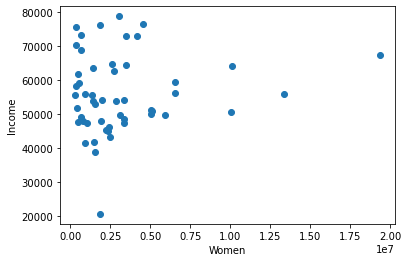

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plotting women's income again with clean data

plt.scatter(clean_us_census.Women, clean_us_census.Income)
plt.xlabel('Women')
plt.ylabel('Income')
plt.show() 
plt.clf()

Histograms of Races
13.
Now, your boss wants you to make a bunch of histograms out of the race data that you have. Look at the .columns again to see what the race categories are.

In [ ]:
clean_us_census.columns

Index(['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'Income', 'GenderPop', 'Men', 'Women'],
      dtype='object')

14.
Try to make a histogram for each one!

You will have to get the columns into numerical format, and those percentage signs will have to go.

Don’t forget to fill the nan values with something that makes sense! You probably dropped the duplicate rows when making your last graph, but it couldn’t hurt to check for duplicates again.

In [ ]:
us_census.head()

State  TotalPop             Hispanic                White  \
0     Alabama   4830620  3.7516156462584975%     61.878656462585%   
1      Alaska    733375   5.909580838323351%  60.910179640718574%   
2     Arizona   6641928  29.565921052631502%  57.120000000000026%   
3    Arkansas   2958208   6.215474452554738%   71.13781021897813%   
4  California  38421464  37.291874687968054%   40.21578881677474%   

                 Black                Native                Asian  \
0   31.25297619047618%   0.4532312925170065%  1.0502551020408146%   
1  2.8485029940119775%    16.39101796407186%   5.450299401197604%   
2  3.8509868421052658%     4.35506578947368%   2.876578947368419%   
3  18.968759124087573%   0.5229197080291965%  1.1423357664233578%   
4   5.677396405391911%  0.40529206190713685%  13.052234148776776%   

                Pacific        Income            GenderPop       Men  \
0  0.03435374149659865%  43296.358603    2341093M_2489527F   2341093   
1   1.0586826347305378%  70354.743902      384160M_349215F    384160   
2  0.16763157894736833%  54207.820955    3299088M_3342840F   3299088   
3  0.14686131386861315%  41935.633968    1451913M_1506295F   1451913   
4  0.35141038442336353%  67264.782303  19087135M_19334329F  19087135   

        Women  
0   2489527.0  
1    349215.0  
2   3342840.0  
3   1506295.0  
4  19334329.0

In [ ]:
# Removing the '%' sign from the data
us_census.Hispanic = us_census.Hispanic.replace('\%','',regex=True)
us_census.White = us_census.White.replace('\%','',regex=True)
us_census.Black = us_census.Black.replace('\%','',regex=True)
us_census.Native = us_census.Native.replace('\%','',regex=True)
us_census.Asian = us_census.Asian.replace('\%','',regex=True)
us_census.Pacific = us_census.Pacific.replace('\%','',regex=True)

us_census.head()

State  TotalPop            Hispanic               White  \
0     Alabama   4830620  3.7516156462584975     61.878656462585   
1      Alaska    733375   5.909580838323351  60.910179640718574   
2     Arizona   6641928  29.565921052631502  57.120000000000026   
3    Arkansas   2958208   6.215474452554738   71.13781021897813   
4  California  38421464  37.291874687968054   40.21578881677474   

                Black               Native               Asian  \
0   31.25297619047618   0.4532312925170065  1.0502551020408146   
1  2.8485029940119775    16.39101796407186   5.450299401197604   
2  3.8509868421052658     4.35506578947368   2.876578947368419   
3  18.968759124087573   0.5229197080291965  1.1423357664233578   
4   5.677396405391911  0.40529206190713685  13.052234148776776   

               Pacific        Income            GenderPop       Men  \
0  0.03435374149659865  43296.358603    2341093M_2489527F   2341093   
1   1.0586826347305378  70354.743902      384160M_349215F    384160   
2  0.16763157894736833  54207.820955    3299088M_3342840F   3299088   
3  0.14686131386861315  41935.633968    1451913M_1506295F   1451913   
4  0.35141038442336353  67264.782303  19087135M_19334329F  19087135   

        Women  
0   2489527.0  
1    349215.0  
2   3342840.0  
3   1506295.0  
4  19334329.0

In [ ]:
# Now converting all these to numeric type

us_census.Hispanic = pd.to_numeric(us_census.Hispanic)
us_census.White = pd.to_numeric(us_census.White)
us_census.Black = pd.to_numeric(us_census.Black)
us_census.Native = pd.to_numeric(us_census.Native)
us_census.Asian = pd.to_numeric(us_census.Asian)
us_census.Pacific = pd.to_numeric(us_census.Pacific)

us_census.dtypes

State         object
TotalPop       int64
Hispanic     float64
White        float64
Black        float64
Native       float64
Asian        float64
Pacific      float64
Income       float64
GenderPop     object
Men            int64
Women        float64
dtype: object

In [ ]:
print(us_census.Hispanic.isnull().value_counts())
print(us_census.White.isnull().value_counts())
print(us_census.Black.isnull().value_counts())
print(us_census.Native.isnull().value_counts())
print(us_census.Asian.isnull().value_counts())
print(us_census.Pacific.isnull().value_counts())

False    60
Name: Hispanic, dtype: int64
False    60
Name: White, dtype: int64
False    60
Name: Black, dtype: int64
False    60
Name: Native, dtype: int64
False    60
Name: Asian, dtype: int64
False    55
True      5
Name: Pacific, dtype: int64


In [ ]:
# So, here we can see that only Pacific column has 5 NaN values.

us_census.Pacific

0     0.034354
1     1.058683
2     0.167632
3     0.146861
4     0.351410
5          NaN
6          NaN
7     0.018599
8          NaN
9     0.029609
10    0.051510
11    0.046602
12    0.046602
13    8.758861
14    0.127181
15    0.020032
16    0.032625
17    0.055164
18    0.055164
19         NaN
20    0.046438
21    0.039184
22    0.015670
23    0.036285
24    0.036285
25    0.019809
26    0.019549
27    0.032909
28    0.015046
29    0.101657
30    0.101657
31    0.072222
32    0.057143
33    0.574521
34    0.016096
35    0.031319
36    0.031319
37    0.042771
38    0.023451
39    0.052326
40         NaN
41    0.022645
42    0.022645
43    0.106220
44    0.345333
45    0.019394
46    0.001240
47    0.035833
48    0.035833
49    0.046978
50    0.041892
51    0.043156
52    0.068816
53    0.825983
54    0.825983
55    0.030601
56    0.064715
57    0.609896
58    0.026446
59    0.020833
Name: Pacific, dtype: float64

In [ ]:
# To tackle these NaN values, we need to fill with mean of the column
nan_Pacific_mean = us_census.Pacific.mean()

In [ ]:
nan_Pacific_mean

0.28292707539332995

In [ ]:
us_census.Pacific = us_census.Pacific.fillna(value=nan_Pacific_mean)
us_census.Pacific

0     0.034354
1     1.058683
2     0.167632
3     0.146861
4     0.351410
5     0.282927
6     0.282927
7     0.018599
8     0.282927
9     0.029609
10    0.051510
11    0.046602
12    0.046602
13    8.758861
14    0.127181
15    0.020032
16    0.032625
17    0.055164
18    0.055164
19    0.282927
20    0.046438
21    0.039184
22    0.015670
23    0.036285
24    0.036285
25    0.019809
26    0.019549
27    0.032909
28    0.015046
29    0.101657
30    0.101657
31    0.072222
32    0.057143
33    0.574521
34    0.016096
35    0.031319
36    0.031319
37    0.042771
38    0.023451
39    0.052326
40    0.282927
41    0.022645
42    0.022645
43    0.106220
44    0.345333
45    0.019394
46    0.001240
47    0.035833
48    0.035833
49    0.046978
50    0.041892
51    0.043156
52    0.068816
53    0.825983
54    0.825983
55    0.030601
56    0.064715
57    0.609896
58    0.026446
59    0.020833
Name: Pacific, dtype: float64

In [ ]:
us_census.head()

State  TotalPop   Hispanic      White      Black     Native  \
0     Alabama   4830620   3.751616  61.878656  31.252976   0.453231   
1      Alaska    733375   5.909581  60.910180   2.848503  16.391018   
2     Arizona   6641928  29.565921  57.120000   3.850987   4.355066   
3    Arkansas   2958208   6.215474  71.137810  18.968759   0.522920   
4  California  38421464  37.291875  40.215789   5.677396   0.405292   

       Asian   Pacific        Income            GenderPop       Men  \
0   1.050255  0.034354  43296.358603    2341093M_2489527F   2341093   
1   5.450299  1.058683  70354.743902      384160M_349215F    384160   
2   2.876579  0.167632  54207.820955    3299088M_3342840F   3299088   
3   1.142336  0.146861  41935.633968    1451913M_1506295F   1451913   
4  13.052234  0.351410  67264.782303  19087135M_19334329F  19087135   

        Women  
0   2489527.0  
1    349215.0  
2   3342840.0  
3   1506295.0  
4  19334329.0

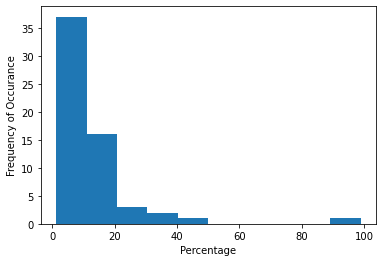

In [ ]:
plt.hist(us_census.Hispanic)
plt.xlabel('Percentage')
plt.ylabel('Frequency of Occurance')
plt.show()

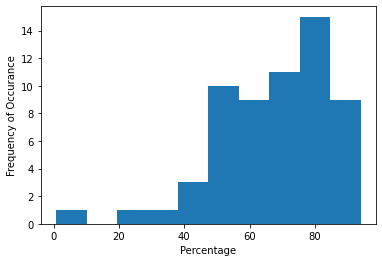

In [ ]:
plt.hist(us_census.White)
plt.xlabel('Percentage')
plt.ylabel('Frequency of Occurance')
plt.show()

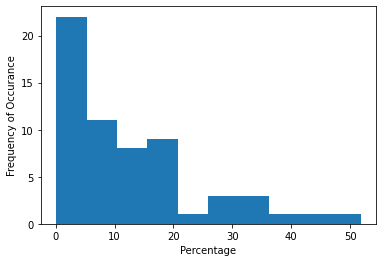

In [ ]:
plt.hist(us_census.Black)
plt.xlabel('Percentage')
plt.ylabel('Frequency of Occurance')
plt.show()

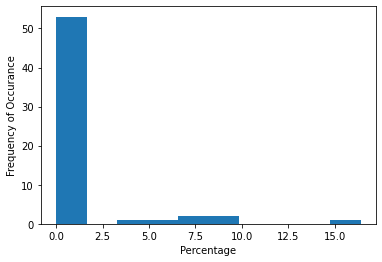

In [ ]:
plt.hist(us_census.Native)
plt.xlabel('Percentage')
plt.ylabel('Frequency of Occurance')
plt.show()

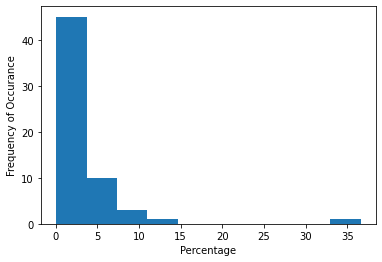

In [ ]:
plt.hist(us_census.Asian)
plt.xlabel('Percentage')
plt.ylabel('Frequency of Occurance')
plt.show()

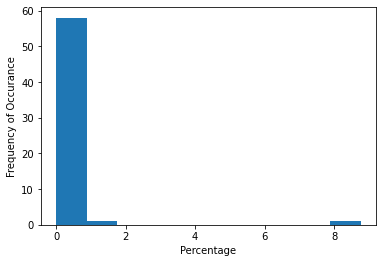

In [ ]:
plt.hist(us_census.Pacific)
plt.xlabel('Percentage')
plt.ylabel('Frequency of Occurance')
plt.show()

#### Get Creative

15.
Phew. You’ve definitely impressed your boss on your first day of work.

But is there a way you really convey the power of pandas and Python over the drudgery of csv and Excel?

Try to make some more interesting graphs to show your boss, and the world! You may need to clean the data even more to do it, or the cleaning you have already done may give you the ease of manipulation you’ve been searching for.

# PART 2:

**LEARN DATA ANALYSIS WITH PANDAS**

Petal Power Inventory
You’re the lead data analyst for a chain of gardening stores called Petal Power. Help them analyze their inventory!

### Answer Customer Emails
1.
Data for all of the locations of Petal Power is in the file inventory.csv. Load the data into a DataFrame called inventory.

In [ ]:
import pandas as pd
inventory = pd.read_csv('inventory.csv')

In [ ]:
inventory = pd.DataFrame(inventory)

2.
Inspect the first 10 rows of inventory.

In [ ]:
inventory.head(10)

location  product_type         product_description  quantity  price
0  Staten Island         seeds                       daisy         4   6.99
1  Staten Island         seeds                  calla lily        46  19.99
2  Staten Island         seeds                      tomato        85  13.99
3  Staten Island  garden tools                        rake         4  13.99
4  Staten Island  garden tools                 wheelbarrow         0  89.99
5  Staten Island  garden tools                       spade        93  19.99
6  Staten Island  pest_control               insect killer        74  12.99
7  Staten Island  pest_control                 weed killer         8  23.99
8  Staten Island       planter  20 inch terracotta planter         0  17.99
9  Staten Island       planter      8 inch plastic planter        53   3.99

3.
The first 10 rows represent data from your Staten Island location. Select these rows and save them to staten_island.

In [ ]:
staten_island = inventory[:10]

In [ ]:
staten_island

location  product_type         product_description  quantity  price
0  Staten Island         seeds                       daisy         4   6.99
1  Staten Island         seeds                  calla lily        46  19.99
2  Staten Island         seeds                      tomato        85  13.99
3  Staten Island  garden tools                        rake         4  13.99
4  Staten Island  garden tools                 wheelbarrow         0  89.99
5  Staten Island  garden tools                       spade        93  19.99
6  Staten Island  pest_control               insect killer        74  12.99
7  Staten Island  pest_control                 weed killer         8  23.99
8  Staten Island       planter  20 inch terracotta planter         0  17.99
9  Staten Island       planter      8 inch plastic planter        53   3.99

In [ ]:
inventory

location  product_type         product_description  quantity  price
0   Staten Island         seeds                       daisy         4   6.99
1   Staten Island         seeds                  calla lily        46  19.99
2   Staten Island         seeds                      tomato        85  13.99
3   Staten Island  garden tools                        rake         4  13.99
4   Staten Island  garden tools                 wheelbarrow         0  89.99
5   Staten Island  garden tools                       spade        93  19.99
6   Staten Island  pest_control               insect killer        74  12.99
7   Staten Island  pest_control                 weed killer         8  23.99
8   Staten Island       planter  20 inch terracotta planter         0  17.99
9   Staten Island       planter      8 inch plastic planter        53   3.99
10       Brooklyn         seeds                       daisy        50   6.99
11       Brooklyn         seeds                  calla lily         0  19.99
12       Brooklyn         seeds                      tomato         0  13.99
13       Brooklyn  garden tools                        rake        15  13.99
14       Brooklyn  garden tools                 wheelbarrow        82  89.99
15       Brooklyn  garden tools                       spade        36  19.99
16       Brooklyn  pest_control               insect killer        80  12.99
17       Brooklyn  pest_control                 weed killer        76  23.99
18       Brooklyn       planter  20 inch terracotta planter         5  17.99
19       Brooklyn       planter      8 inch plastic planter        26   3.99
20         Queens         seeds                       daisy        57   6.99
21         Queens         seeds                  calla lily        95  19.99
22         Queens         seeds                      tomato        45  13.99
23         Queens  garden tools                        rake        21  13.99
24         Queens  garden tools                 wheelbarrow        98  89.99
25         Queens  garden tools                       spade        26  19.99
26         Queens  pest_control               insect killer         0  12.99
27         Queens  pest_control                 weed killer        16  23.99
28         Queens       planter  20 inch terracotta planter        87  17.99

4.
A customer just emailed you asking what products are sold at your Staten Island location. Select the column product_description from staten_island and save it to the variable product_request.

In [ ]:
product_request = staten_island['product_description']
product_request

0                         daisy
1                    calla lily
2                        tomato
3                          rake
4                   wheelbarrow
5                         spade
6                 insect killer
7                   weed killer
8    20 inch terracotta planter
9        8 inch plastic planter
Name: product_description, dtype: object

5.
Another customer emails to ask what types of seeds are sold at the Brooklyn location.

Select all rows where location is equal to Brooklyn and product_type is equal to seeds and save them to the variable seed_request

In [ ]:
inventory[(inventory.location == 'Brooklyn') & (inventory.product_type == 'seeds')]

location product_type product_description  quantity  price
10  Brooklyn        seeds               daisy        50   6.99
11  Brooklyn        seeds          calla lily         0  19.99
12  Brooklyn        seeds              tomato         0  13.99

In [ ]:
seed_request = inventory[(inventory.location == 'Brooklyn') & (inventory.product_type == 'seeds')]
seed_request

location product_type product_description  quantity  price
10  Brooklyn        seeds               daisy        50   6.99
11  Brooklyn        seeds          calla lily         0  19.99
12  Brooklyn        seeds              tomato         0  13.99

### Inventory
6.
Add a column to inventory called in_stock which is True if quantity is greater than 0 and False if quantity equals 0.

In [ ]:
inventory['in_stock'] = inventory.apply(lambda row: True if row.quantity > 0 else False, axis=1)
inventory.head()

location  product_type product_description  quantity  price  in_stock
0  Staten Island         seeds               daisy         4   6.99      True
1  Staten Island         seeds          calla lily        46  19.99      True
2  Staten Island         seeds              tomato        85  13.99      True
3  Staten Island  garden tools                rake         4  13.99      True
4  Staten Island  garden tools         wheelbarrow         0  89.99     False

7.
Petal Power wants to know how valuable their current inventory is.

Create a column called total_value that is equal to price multiplied by quantity.

In [ ]:
inventory['total_value'] = inventory.apply(lambda row: row.price * row.quantity, axis=1)
inventory.head()

location  product_type product_description  quantity  price  in_stock  \
0  Staten Island         seeds               daisy         4   6.99      True   
1  Staten Island         seeds          calla lily        46  19.99      True   
2  Staten Island         seeds              tomato        85  13.99      True   
3  Staten Island  garden tools                rake         4  13.99      True   
4  Staten Island  garden tools         wheelbarrow         0  89.99     False   

   total_value  
0        27.96  
1       919.54  
2      1189.15  
3        55.96  
4         0.00

8.
The Marketing department wants a complete description of each product for their catalog.

The following lambda function combines product_type and product_description into a single string:

    combine_lambda = lambda row: \
        '{} - {}'.format(row.product_type,
                     row.product_description)
Paste this function into script.py.

In [ ]:
combine_lambda = lambda row: '{} - {}'.format(row.product_type, row.product_description)
combine_lambda

<function __main__.<lambda>(row)>

9.
Using combine_lambda, create a new column in inventory called full_description that has the complete description of each product.

In [ ]:
inventory['full_description'] = inventory.apply(combine_lambda, axis=1)

In [ ]:
inventory.head()

location  product_type product_description  quantity  price  in_stock  \
0  Staten Island         seeds               daisy         4   6.99      True   
1  Staten Island         seeds          calla lily        46  19.99      True   
2  Staten Island         seeds              tomato        85  13.99      True   
3  Staten Island  garden tools                rake         4  13.99      True   
4  Staten Island  garden tools         wheelbarrow         0  89.99     False   

   total_value            full_description  
0        27.96               seeds - daisy  
1       919.54          seeds - calla lily  
2      1189.15              seeds - tomato  
3        55.96         garden tools - rake  
4         0.00  garden tools - wheelbarrow